In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [839]:
result_path = "/users/hjd/HJW_take_over/SNUH_hjd/best_models_for_manuscript/pretrain_model/"

In [859]:
for i,model in enumerate(os.listdir(result_path)):
    if not os.path.isdir(result_path+model):
        continue
    if 'fail' in model or "0.8,0.8" in model:
        continue
    model_dir = os.path.join(result_path,model)
    print(i,model)
    if 'Outer_fold_5' not in os.listdir(model_dir):
        continue
    for idx, fold in enumerate(os.listdir(model_dir)):
        if '_Full' in fold or 'WFM' in fold or 'weights' in fold:
            continue
        else:
            fold_direc = os.path.join(model_dir,fold)
            fold_csv = pd.read_csv(fold_direc+"/outer_cv.csv",sep=',',index_col=0)
            fold_csv['Fold'] = int(fold.split('_')[-1])
            if idx == 0:
                total_fold_csv = fold_csv
            else:
                total_fold_csv = pd.concat([total_fold_csv,fold_csv])
                
    hsp = model_dir.split("Hsp:[")[1].split("]_")[0]
    first_hsp = hsp.split(",")[0]
    max_beta = model_dir.split("Maxb:[")[1].split("]_")[0]
    beta_lr = model_dir.split("Betalr:[")[1].split("]_")[0]
    lr = float(model_dir.split("LR:[")[1].split("]_")[0])
    act_func = model_dir.split("Act:[")[1].split("]_")[0]
    opt = model_dir.split("Opt:[")[1].split("]_")[0]
    dropout = model_dir.split("DO:[")[1].split("]_")[0]
    lambda_ = model_dir.split("lambda:[")[1].split("]_")[0]
#     randomseed = model_dir.split("seed[")[1].split("]")[0]
#     sample = model_dir.split("SampleRatio:[")[1].split("]")[0]
    
    total_fold_csv[['model_idx','hsp','max_beta','beta_lr','lr','act_func','opt','dropout','lambda',
                   'seed','first_hsp']] = i,hsp,max_beta,beta_lr,lr,act_func,opt,dropout,lambda_,randomseed,first_hsp
    
#     total_fold_csv['Sample_ratio'] = sample
    
    total_fold_csv.sort_values(by='Fold',inplace=True)
    total_fold_csv.reset_index(inplace=True,drop=True)
    total_fold_csv_melted = total_fold_csv.melt(id_vars=['Fold'],
                       value_vars=['train_corr','valid_corr'])
    
    if i == 0:
        total_model_csv = total_fold_csv
    else:
        total_model_csv = pd.concat([total_model_csv,total_fold_csv])

0 Hsp:[0.95,0.3,0.3]_Maxb:[0.01, 0.05, 0.05]_Betalr:[0.0001, 0.001, 0.001]_LR:[5e-05]_Act:[elu]_Opt:[nag]_DO:[0.9,0.9,0.0]_lambda:[0.01]
1 Hsp:[0.975,0.3,0.3]_Maxb:[0.02, 0.05, 0.05]_Betalr:[0.0001, 0.001, 0.001]_LR:[1e-05]_Act:[elu]_Opt:[nag]_DO:[0.9,0.9,0.0]_lambda:[0.01]
2 Hsp:[0.8,0.3,0.3]_Maxb:[0.01, 0.05, 0.05]_Betalr:[0.0001, 0.001, 0.001]_LR:[5e-05]_Act:[elu]_Opt:[nag]_DO:[0.9,0.9,0.0]_lambda:[0.01]
3 Hsp:[0.9,0.3,0.3]_Maxb:[0.01, 0.05, 0.05]_Betalr:[0.0001, 0.001, 0.001]_LR:[5e-05]_Act:[elu]_Opt:[nag]_DO:[0.9,0.9,0.0]_lambda:[0.01]


In [853]:
# total_model_csv['train_mae'] = [float(i.split("(")[1].split(",")[0]) for i in total_model_csv['train_mae'].values]
# total_model_csv['valid_mae'] = [float(i.split("(")[1].split(",")[0]) for i in total_model_csv['valid_mae'].values]
# total_model_csv['test_mae'] = [float(i.split("(")[1].split(",")[0]) for i in total_model_csv['test_mae'].values]

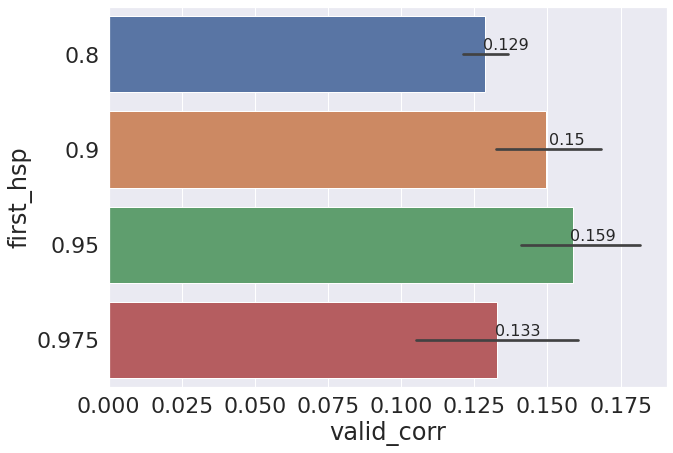

In [861]:
# total_model_csv_42 = total_model_csv.loc[total_model_csv['seed']=='42',:]
plt.figure(figsize=(10,7))
sns.set(style="darkgrid", font_scale=2)
fig = sns.barplot(x='valid_corr',y='first_hsp',data=total_model_csv,orient='h',
                 order=["0.8","0.9","0.95","0.975"]
                 )
# plt.xlim([0.43,0.45])
for p in fig.patches:
    fig.annotate(np.round(float(p.get_width()),3), 
                   (p.get_width()+0.007,p.get_y()+0.4), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), fontsize=16,
                   textcoords = 'offset points')

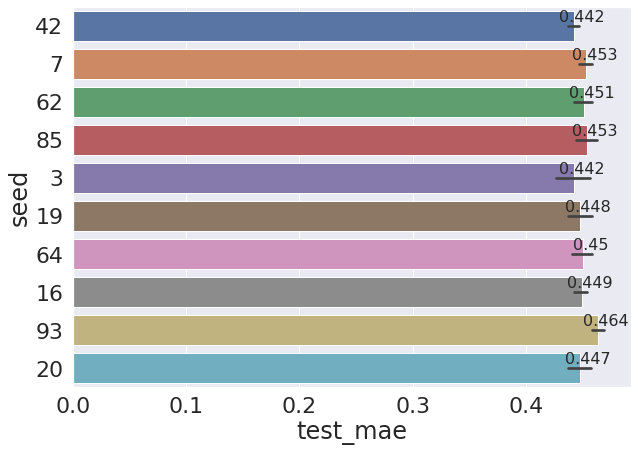

In [684]:
total_model_csv_p = total_model_csv.loc[total_model_csv['hsp']=='0.9,0.8,0.3',:]
plt.figure(figsize=(10,7))
sns.set(style="darkgrid", font_scale=2)
fig = sns.barplot(x='test_mae',y='seed',data=total_model_csv_p,orient='h')
for p in fig.patches:
    fig.annotate(np.round(float(p.get_width()),3), 
                   (p.get_width()+0.007,p.get_y()+0.4), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), fontsize=16,
                   textcoords = 'offset points')

In [366]:
total_model_csv

,train_corr,valid_corr,train_mae,valid_mae,train_acc,valid_acc,Fold,model_idx,hsp,max_beta,beta_lr,lr,act_func,opt,dropout,lambda,seed,Sample_ratio
0,0.309087,0.148214,"tensor(0.4332, device='cuda:0')",0.4475,0.550207,0.616013,1,0,"0.95,0.3,0.3","0.01, 0.05, 0.05","0.0001, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0",0.01,42,0.2
1,0.272188,0.151871,"tensor(0.4425, device='cuda:0')",0.4251,0.538169,0.499921,2,0,"0.95,0.3,0.3","0.01, 0.05, 0.05","0.0001, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0",0.01,42,0.2
2,0.263569,0.119775,"tensor(0.4449, device='cuda:0')",0.4248,0.528342,0.672368,3,0,"0.95,0.3,0.3","0.01, 0.05, 0.05","0.0001, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0",0.01,42,0.2
3,0.285374,0.233304,"tensor(0.4407, device='cuda:0')",0.4241,0.520927,0.658897,4,0,"0.95,0.3,0.3","0.01, 0.05, 0.05","0.0001, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0",0.01,42,0.2
4,0.276249,0.175798,"tensor(0.4300, device='cuda:0')",0.4712,0.553479,0.643412,5,0,"0.95,0.3,0.3","0.01, 0.05, 0.05","0.0001, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0",0.01,42,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.571446,0.129922,"tensor(0.3513, device='cuda:0')",0.4643,0.391071,0.201852,1,16,"0.9,0.3,0.3","0.02, 0.05, 0.05","0.002, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0",0.01,42,0.08
1,0.637776,0.223139,"tensor(0.3433, device='cuda:0')",0.4177,0.352580,0.287866,2,16,"0.9,0.3,0.3","0.02, 0.05, 0.05","0.002, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0",0.01,42,0.08
2,0.539082,-0.063417,"tensor(0.3616, device='cuda:0')",0.4839,0.413095,0.342593,3,16,"0.9,0.3,0.3","0.02, 0.05, 0.05","0.002, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0",0.01,42,0.08
3,0.598807,0.205177,"tensor(0.3665, device='cuda:0')",0.3960,0.335487,0.288304,4,16,"0.9,0.3,0.3","0.02, 0.05, 0.05","0.002, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0",0.01,42,0.08


In [ ]:
sns.lineplot(x='variable',y='value',data=krr2_melted.loc[krr2_melted['metric']=='MAE'],label='KRR_rbf')

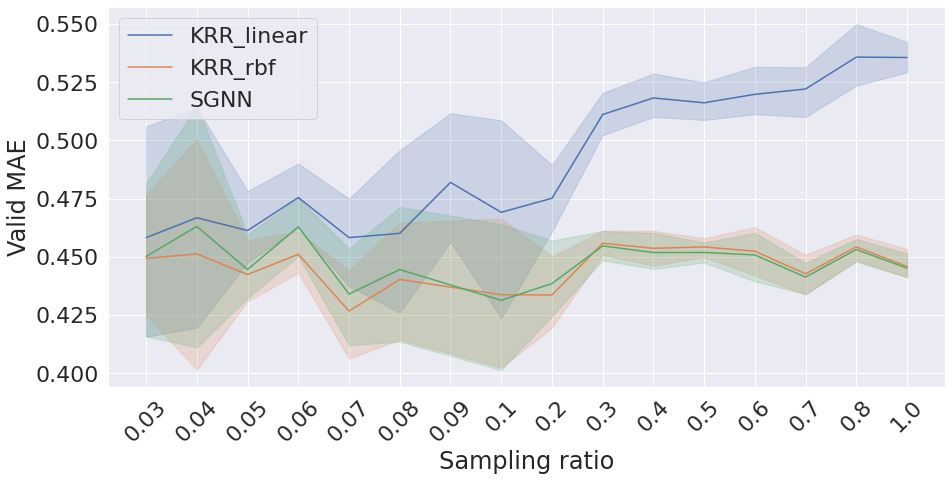

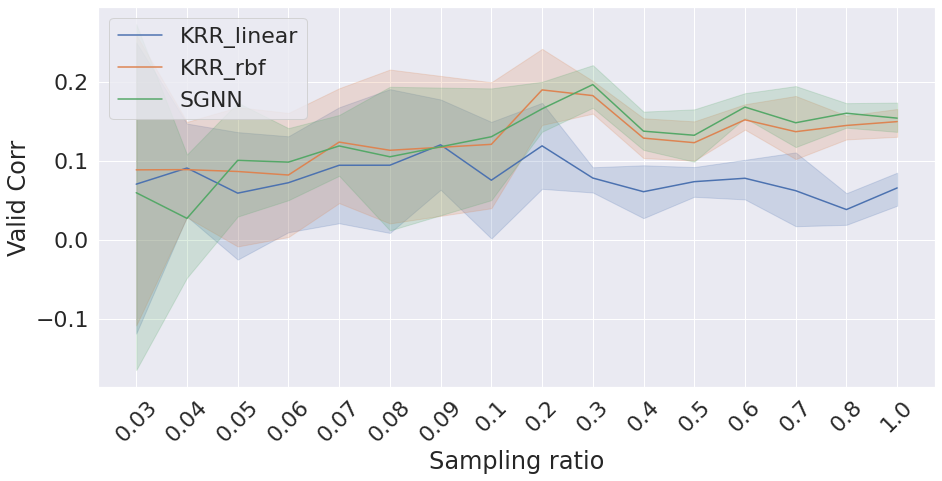

In [390]:
krr1 = pd.read_csv("/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/pretrain_model_sampled/p/KRR_sampled_ABCD_result.csv")
krr2 = pd.read_csv("/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/pretrain_model_sampled/p/KRR_rbf_sampled_ABCD_result.csv")
krr1_melted = krr1.melt(id_vars='metric')
krr2_melted = krr2.melt(id_vars='metric')
plt.figure(figsize=(15,7))
sns.lineplot(x='variable',y='value',data=krr1_melted.loc[krr1_melted['metric']=='MAE'],label='KRR_linear')
sns.lineplot(x='variable',y='value',data=krr2_melted.loc[krr2_melted['metric']=='MAE'],label='KRR_rbf')
sns.lineplot(x="Sample_ratio",y='valid_mae',data=total_model_csv,label='SGNN')
plt.ylabel("Valid MAE")
plt.xlabel("Sampling ratio")
plt.xticks(rotation=45)
# plt.ylim(0.44,0.45)
plt.show()

plt.figure(figsize=(15,7))
sns.lineplot(x='variable',y='value',data=krr1_melted.loc[krr1_melted['metric']=='Corr'],label='KRR_linear')
sns.lineplot(x='variable',y='value',data=krr2_melted.loc[krr2_melted['metric']=='Corr'],label='KRR_rbf')
sns.lineplot(x="Sample_ratio",y='valid_corr',data=total_model_csv,label='SGNN')
plt.ylabel("Valid Corr")
plt.xlabel("Sampling ratio")
plt.xticks(rotation=45)
# plt.ylim(0.14,0.16)
plt.show()

In [239]:
hsp_cand = [0.975,0.95,0.9,0.8]
hsp_cand2 = [0.3,0.8]
lr_cand = [1e-4, 5e-5, 1e-5]

result_mat = pd.DataFrame(index=hsp_cand, columns = hsp_cand2)

for hsp in hsp_cand:
    for hsp2 in hsp_cand2:
        corr = total_model_csv.loc[(total_model_csv['hsp']==f"{hsp},{hsp2},{hsp2}")&(total_model_csv['lr']==5e-5)&(total_model_csv['dropout'] == '0.9,0.9,0.0'),'valid_mae']
        assert len(corr)==5
        result_mat.loc[hsp,hsp2] = np.mean(corr)

<AxesSubplot:>

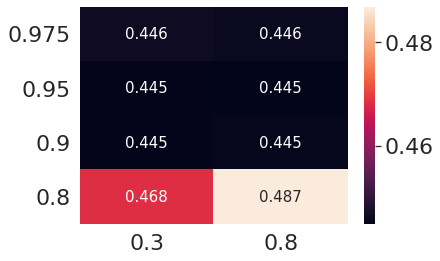

In [240]:
sns.heatmap(result_mat.astype(float),annot=True,fmt='.3g',annot_kws={'fontsize':15})

<AxesSubplot:>

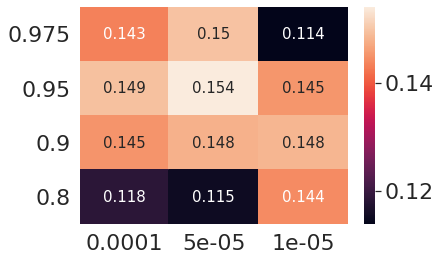

In [88]:
sns.heatmap(result_mat.astype(float),annot=True,fmt='.3g',annot_kws={'fontsize':15})

In [149]:
total = pd.read_csv("/users/hjd/HJW_take_over/Results/Transfer_totalsbj_result/result_df.csv",sep = '\t')
hcmdd = pd.read_csv("/users/hjd/HJW_take_over/Results/Transfer_HC+MDD_result/result_df.csv", sep = '\t')
total['status'] = 'total'
hcmdd['status'] = 'hcmdd'

test_fin = pd.concat([total,hcmdd])
test_fin

,CC,test,lr,beta_lr,max_beta,train_idx,test_idx,l2_param,batch_size,act_func,optimizer,momentum,status
0,0.224856,test,0.00005,"[0.0001, 0.001]","[0.005, 0.05]",[ 67 12 24 45 108 89 73 64 15 112 22 ...,[ 18 42 36 76 53 91 56 123 93 4 27 1...,0.05,4,elu,nag,0.9,total
1,0.186007,test,0.00005,"[0.0001, 0.001]","[0.005, 0.05]",[ 39 91 109 75 25 124 20 59 18 68 60 ...,[115 15 37 33 6 7 9 116 112 99 17 ...,0.05,4,elu,nag,0.9,total
2,0.022147,test,0.00005,"[0.0001, 0.001]","[0.005, 0.05]",[116 111 72 5 43 69 28 42 80 99 73 ...,[ 52 108 105 25 112 12 107 61 101 114 110 ...,0.05,4,elu,nag,0.9,total
3,0.020862,test,0.00005,"[0.0001, 0.001]","[0.005, 0.05]",[ 78 30 100 43 37 121 107 40 66 82 2 ...,[105 99 63 106 20 1 74 124 70 10 9 ...,0.05,4,elu,nag,0.9,total
4,0.229311,test,0.00005,"[0.0001, 0.001]","[0.005, 0.05]",[117 81 26 100 51 92 2 4 116 41 30 ...,[ 97 75 44 82 118 14 5 52 121 94 86 ...,0.05,4,elu,nag,0.9,total
5,0.447849,test,0.00005,"[0.0001, 0.001]","[0.005, 0.05]",[122 68 112 8 110 75 21 123 34 86 39 ...,[106 81 78 42 41 118 33 50 6 93 124 ...,0.05,4,elu,nag,0.9,total
6,0.217619,test,0.00005,"[0.0001, 0.001]","[0.005, 0.05]",[ 51 121 12 81 109 107 63 43 66 19 116 ...,[ 79 120 30 21 96 6 47 27 34 40 89 ...,0.05,4,elu,nag,0.9,total
7,0.246288,test,0.00005,"[0.0001, 0.001]","[0.005, 0.05]",[ 49 74 102 8 94 23 30 34 10 29 3 ...,[ 31 118 101 83 66 64 61 100 109 28 110 ...,0.05,4,elu,nag,0.9,total
8,0.015422,test,0.00005,"[0.0001, 0.001]","[0.005, 0.05]",[ 40 118 98 81 58 6 105 106 103 45 93 1...,[ 95 69 53 75 47 66 28 15 97 116 50 ...,0.05,4,elu,nag,0.9,total
9,0.235011,test,0.00005,"[0.0001, 0.001]","[0.005, 0.05]",[ 83 47 66 87 118 27 49 21 80 32 64 1...,[ 85 3 63 86 84 57 93 55 96 29 15 ...,0.05,4,elu,nag,0.9,total


In [158]:
total_cc = total['CC'].values
hcmdd_cc = hcmdd['CC'].values

In [159]:
import scipy.stats

scipy.stats.ttest_ind(total_cc, hcmdd_cc, equal_var=False)

Ttest_indResult(statistic=-1.6739858342676, pvalue=0.10234731361786556)

In [160]:
scipy.stats.ttest_rel(total_cc, hcmdd_cc)

Ttest_relResult(statistic=-4.436960765818113, pvalue=0.0002829199398018161)

## Two model comparison

In [169]:
model1 = "/users/hjd/HJW_take_over/SNUH_hjd/pretrain_model/SGNN/Hsp:[0.95,0.3,0.3]_Maxb:[0.02, 0.05, 0.05]_Betalr:[0.0001, 0.001, 0.001]_LR:[1e-05]_Act:[elu]_Opt:[nag]_DO:[0.9,0.9,0.0]_lambda:[0.01]"
model2 = "/users/hjd/HJW_take_over/SNUH_hjd/pretrain_model/SGNN/Hsp:[0.95,0.3,0.3]_Maxb:[0.01, 0.05, 0.05]_Betalr:[0.0001, 0.001, 0.001]_LR:[5e-05]_Act:[elu]_Opt:[nag]_DO:[0.9,0.9,0.0]_lambda:[0.01]"

for fold in range(1,6):
    model1_fold_cv = pd.read_csv(model1+f"/Outer_fold_{fold}/outer_cv.csv",sep=',',index_col=0)
    model2_fold_cv = pd.read_csv(model2+f"/Outer_fold_{fold}/outer_cv.csv",sep=',',index_col=0)

    if fold ==1:
        model1_cv = model1_fold_cv
        model2_cv = model2_fold_cv
    else:
        model1_cv = pd.concat([model1_cv,model1_fold_cv])
        model2_cv = pd.concat([model2_cv,model2_fold_cv])

model1_cv['model'] = 1
model2_cv['model'] = 2

model_df = pd.concat([model1_cv,model2_cv])

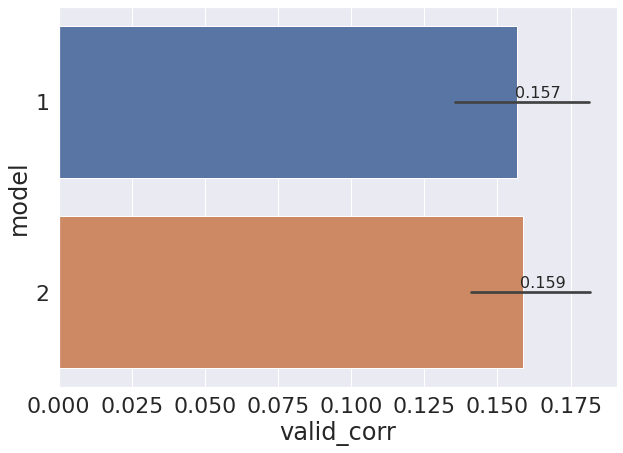

In [170]:
plt.figure(figsize=(10,7))
sns.set(style="darkgrid", font_scale=2)
fig = sns.barplot(x='valid_corr',y='model',data=model_df,orient='h')
for p in fig.patches:
    fig.annotate(np.round(float(p.get_width()),3), 
                   (p.get_width()+0.007,p.get_y()+0.4), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), fontsize=16,
                   textcoords = 'offset points')

In [117]:
pd.read_csv("/users/hjd/HJW_take_over/SNUH_hjd/pretrain_model/SGNN/Hsp:[0.0,0.0,0.0]_Maxb:[0.01, 0.05, 0.05]_Betalr:[0.0001, 0.001, 0.001]_LR:[1e-05]_Act:[elu]_Opt:[nadam]_DO:[0.3,0.3,0.0]_lambda:[0.01]/Outer_fold_1/outer_cv.csv",sep=',')

,Unnamed: 0,train_corr,valid_corr,train_mae,valid_mae,train_acc,valid_acc
0,0,0.947665,0.087395,"tensor(0.2544, device='cuda:0')","tensor(0.8246, device='cuda:0')",0.454071,0.470001


## p-factor distribution

In [76]:
data_path = "/users/hjw/data/ABCD/npz_files/rsfc_p_site_scanner_si_ge.npz"
data = np.load(data_path, allow_pickle=True)
abcd_p = data["y"][:,0]
snuh_p = np.load("/users/hjw/data/SNUH/SNUH_CFA_p.npz")["p"]

In [82]:
df = pd.DataFrame(columns=['data','p'])
df['p'] = abcd_p.tolist()+snuh_p.tolist()
df['data'] = ['ABCD']*len(abcd_p)+['SNUH']*len(snuh_p)

<AxesSubplot:xlabel='data', ylabel='p'>

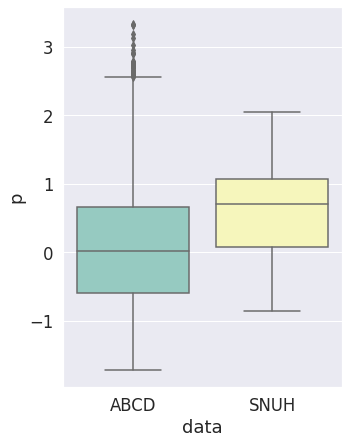

In [88]:
sns.set(style='darkgrid',palette='Set3',font_scale=1.5)
plt.figure(figsize=(5,7))
sns.boxplot(x='data',y='p',data=df)

## HSP별 확인

In [219]:
root_path = "/users/hjd/HJW_take_over/SNUH_hjd/best_models_for_manuscript/pretrain/"

In [224]:
model_dir_list = []
for model in os.listdir(root_path):
#     if "0.95,0.3" not in model:
#         continue
    model_dir_list.append(os.path.join(root_path,model))
len(model_dir_list)

6

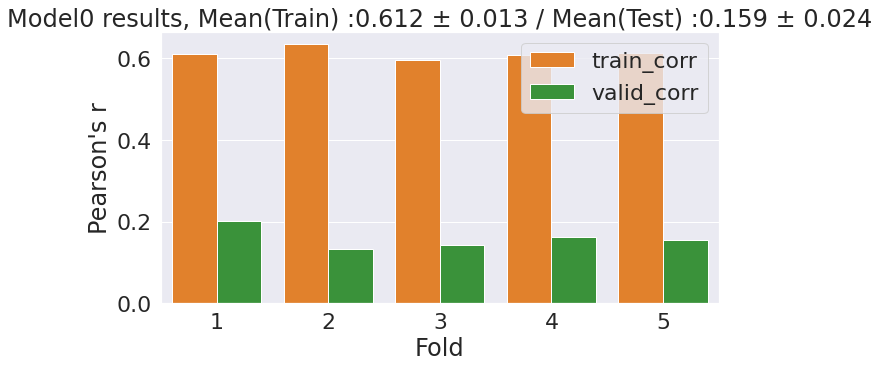

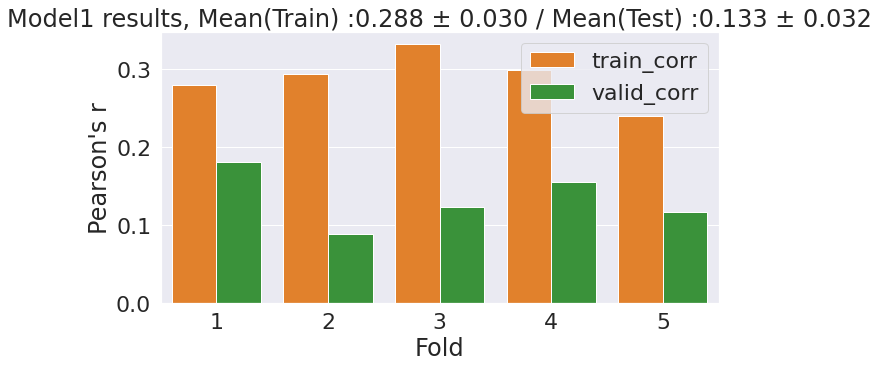

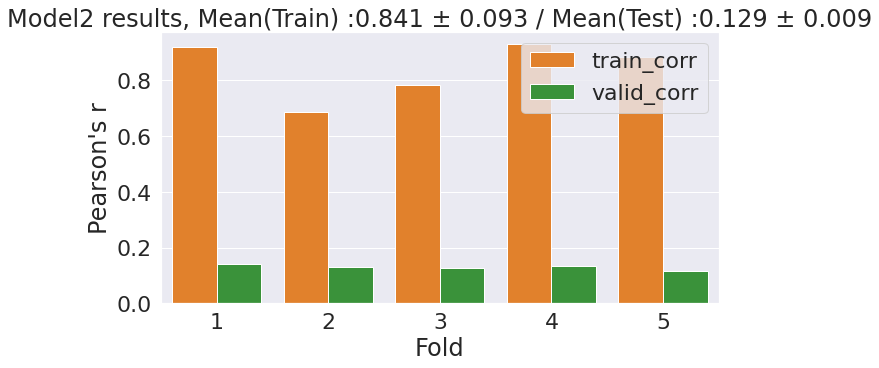

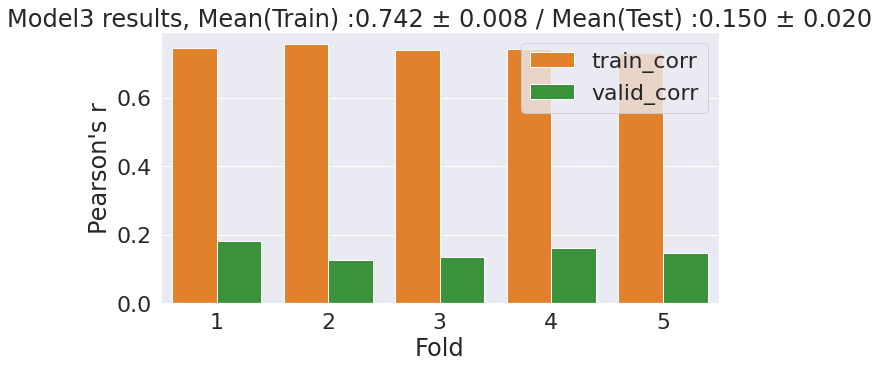

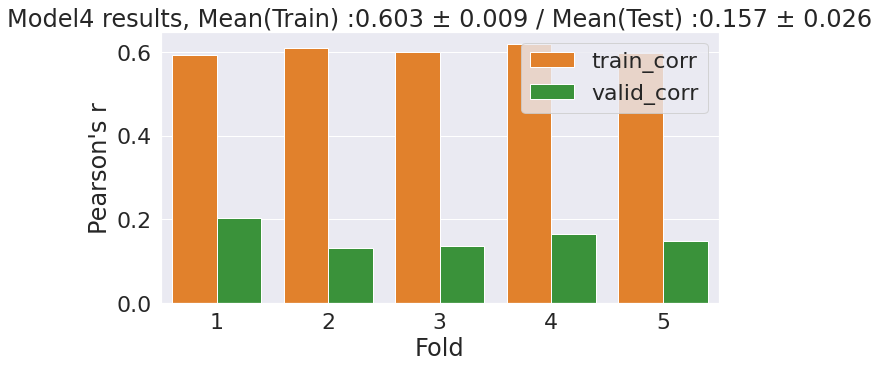

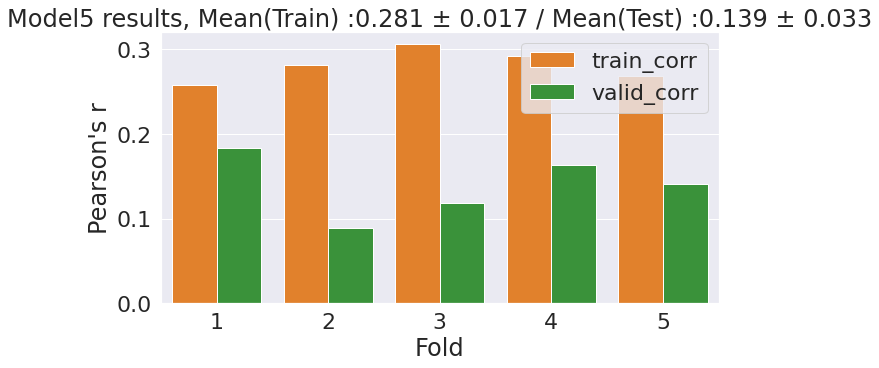

In [225]:
idx_p=0
for idx,model_dir in enumerate(model_dir_list):
    if "Outer_fold_5" not in os.listdir(model_dir):
        continue
    for idx2, fold in enumerate(os.listdir(model_dir)):
        if 'Outer_fold_' in fold and '_Full' not in fold:
            fold_direc = os.path.join(model_dir,fold)
            fold_csv = pd.read_csv(fold_direc+"/outer_cv.csv",sep=',',index_col=0)
            fold_csv['Fold'] = int(fold.split('_')[-1])
            if idx2 == 0:
                total_fold_csv = fold_csv
            else:
                total_fold_csv = pd.concat([total_fold_csv,fold_csv])

    hsp = model_dir.split("Hsp:[")[1].split("]_")[0]
    max_beta = model_dir.split("Maxb:[")[1].split("]_")[0]
    beta_lr = model_dir.split("Betalr:[")[1].split("]_")[0]
    lr = float(model_dir.split("LR:[")[1].split("]_")[0])
    act_func = model_dir.split("Act:[")[1].split("]_")[0]
    opt = model_dir.split("Opt:[")[1].split("]_")[0]
    dropout = model_dir.split("DO:[")[1].split("]_")[0]


    total_fold_csv[['model_idx','hsp','max_beta','beta_lr','lr',
                    'act_func','optimizer','dropout']] = idx,hsp,max_beta,beta_lr,lr,act_func,opt,dropout
    total_fold_csv.sort_values(by='Fold',inplace=True)
    total_fold_csv.reset_index(inplace=True,drop=True)
    total_fold_csv_melted = total_fold_csv.melt(id_vars=['Fold'],
                       value_vars=['train_corr','valid_corr'])
    
    plt.figure(figsize=(10,5))
    plt.title(f"Model{idx} results, Mean(Train) :%.3f \u00B1 %.3f / Mean(Test) :%.3f \u00B1 %.3f" 
              %(np.mean(total_fold_csv['train_corr']),np.std(total_fold_csv['train_corr']),
               np.mean(total_fold_csv['valid_corr']),np.std(total_fold_csv['valid_corr'])))
    sns.barplot(y='value',x='Fold',hue='variable',
                data=total_fold_csv_melted,orient='v',palette = sns.color_palette("tab10")[1:])
    plt.ylabel("Pearson's r")
    plt.legend()
    plt.show()
    
    if idx_p == 0:
        total_model_csv = total_fold_csv
        idx_p+=1
    else:
        total_model_csv = pd.concat([total_model_csv,total_fold_csv])

In [226]:
total_model_csv

,train_corr,valid_corr,train_mae,valid_mae,train_acc,valid_acc,Fold,model_idx,hsp,max_beta,beta_lr,lr,act_func,optimizer,dropout
0,0.611089,0.201300,"tensor(0.6828, device='cuda:0')","tensor(0.7196, device='cuda:0')",0.158105,0.168416,1,0,"0.95,0.3,0.3","0.01, 0.05, 0.05","0.0001, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0"
1,0.633781,0.131963,"tensor(0.6729, device='cuda:0')","tensor(0.7223, device='cuda:0')",0.158343,0.152016,2,0,"0.95,0.3,0.3","0.01, 0.05, 0.05","0.0001, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0"
2,0.594763,0.142930,"tensor(0.6769, device='cuda:0')","tensor(0.7419, device='cuda:0')",0.158777,0.174362,3,0,"0.95,0.3,0.3","0.01, 0.05, 0.05","0.0001, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0"
3,0.607259,0.161599,"tensor(0.6796, device='cuda:0')","tensor(0.7234, device='cuda:0')",0.168461,0.184761,4,0,"0.95,0.3,0.3","0.01, 0.05, 0.05","0.0001, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0"
4,0.612143,0.155123,"tensor(0.6784, device='cuda:0')","tensor(0.7266, device='cuda:0')",0.145794,0.151349,5,0,"0.95,0.3,0.3","0.01, 0.05, 0.05","0.0001, 0.001, 0.001",0.00005,elu,nag,"0.9,0.9,0.0"
0,0.278998,0.180728,"tensor(0.7373, device='cuda:0')","tensor(0.7287, device='cuda:0')",0.352211,0.333724,1,1,"0.975,0.3,0.3","0.02, 0.05, 0.05","0.0001, 0.001, 0.001",0.00001,elu,nag,"0.9,0.9,0.0"
1,0.293844,0.088314,"tensor(0.7345, device='cuda:0')","tensor(0.7256, device='cuda:0')",0.319024,0.296150,2,1,"0.975,0.3,0.3","0.02, 0.05, 0.05","0.0001, 0.001, 0.001",0.00001,elu,nag,"0.9,0.9,0.0"
2,0.331536,0.123181,"tensor(0.7246, device='cuda:0')","tensor(0.7460, device='cuda:0')",0.263521,0.268836,3,1,"0.975,0.3,0.3","0.02, 0.05, 0.05","0.0001, 0.001, 0.001",0.00001,elu,nag,"0.9,0.9,0.0"
3,0.298191,0.155220,"tensor(0.7343, device='cuda:0')","tensor(0.7266, device='cuda:0')",0.324799,0.323993,4,1,"0.975,0.3,0.3","0.02, 0.05, 0.05","0.0001, 0.001, 0.001",0.00001,elu,nag,"0.9,0.9,0.0"
4,0.239885,0.116490,"tensor(0.7417, device='cuda:0')","tensor(0.7322, device='cuda:0')",0.523834,0.519834,5,1,"0.975,0.3,0.3","0.02, 0.05, 0.05","0.0001, 0.001, 0.001",0.00001,elu,nag,"0.9,0.9,0.0"


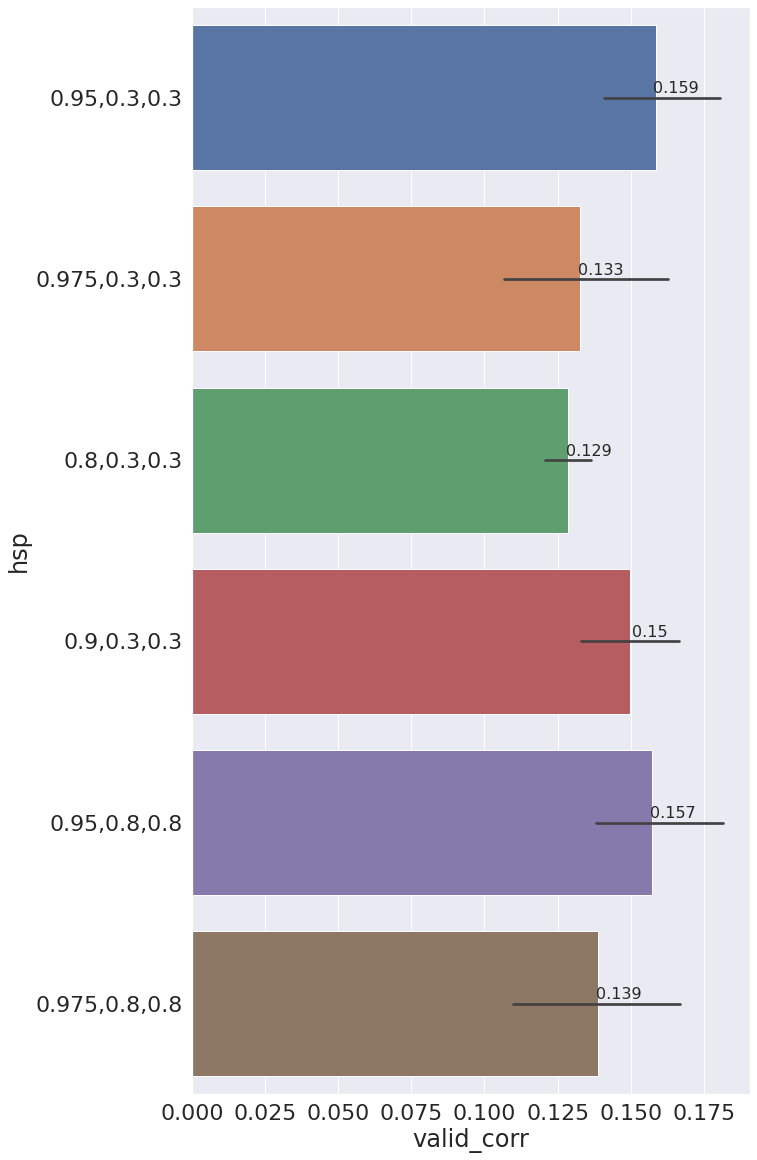

In [228]:
plt.figure(figsize=(10,20))
sns.set(style="darkgrid", font_scale=2)
fig = sns.barplot(x='valid_corr',y='hsp',data=total_model_csv,orient='h')
for p in fig.patches:
    fig.annotate(np.round(float(p.get_width()),3), 
                   (p.get_width()+0.007,p.get_y()+0.4), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), fontsize=16,
                   textcoords = 'offset points')

## Sparsity comparison

In [821]:
hsp_w = pd.read_csv("/users/hjd/IG_my_study/SNUH/data/CFA_factors_results/pretrain_model/Avg_w_with_randomseed.csv",sep=',')

In [823]:
mean_w_df = pd.DataFrame()
max_w_df = pd.DataFrame()
#Get Top 0.1%
top_dict ={}

for i in hsp_w:
    print(i)
    mean_abs_w = np.mean(np.abs(hsp_w[i]))
    max_abs_w = np.max(np.abs(hsp_w[i]))
    print(mean_abs_w, max_abs_w)
    print(np.where(np.abs(hsp_w[i])==max_abs_w))
    print("==============")
    mean_w_df[i] = [mean_abs_w]
    max_w_df[i] = [max_abs_w]
    
    thres = np.percentile(np.abs(hsp_w[i]),95.0)
    top = np.where(np.abs(hsp_w[i])>=thres)
    top_dict[i] = top

3
6.535546120930541e-08 4.716481e-06
(array([35832]),)
7
6.577273423701214e-08 5.690633799999999e-06
(array([35832]),)
16
6.239507095332199e-08 4.3188174000000005e-06
(array([52083]),)
19
1.1202401193180396e-07 6.746776e-06
(array([35832]),)
20
9.744757038476824e-08 6.6254834e-06
(array([35832]),)
42
8.179825647833327e-08 5.4583450000000005e-06
(array([35832]),)
62
9.040117282150889e-08 4.880234e-06
(array([33335]),)
64
1.0984565300051545e-07 5.689818e-06
(array([52083]),)
85
9.405652377299279e-08 6.6396015e-06
(array([35832]),)
93
1.120634925072728e-07 4.262873e-06
(array([52083]),)


In [824]:
abs_w_df =pd.concat([mean_w_df,max_w_df]).T
abs_w_df.columns=['mean','max']
abs_w_df

,mean,max
3,6.535546e-08,0.000005
7,6.577273e-08,0.000006
16,6.239507e-08,0.000004
19,1.120240e-07,0.000007
20,9.744757e-08,0.000007
42,8.179826e-08,0.000005
62,9.040117e-08,0.000005
64,1.098457e-07,0.000006
85,9.405652e-08,0.000007
93,1.120635e-07,0.000004


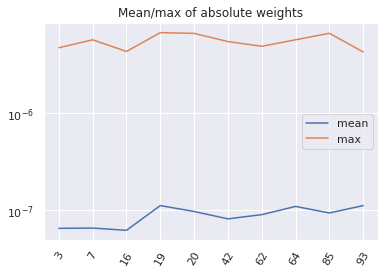

In [825]:
sns.set(style='darkgrid',font_scale=1)
plt.plot(abs_w_df)
plt.title("Mean/max of absolute weights")
plt.xticks(rotation=60)
plt.yscale("log")
plt.legend(['mean','max'])

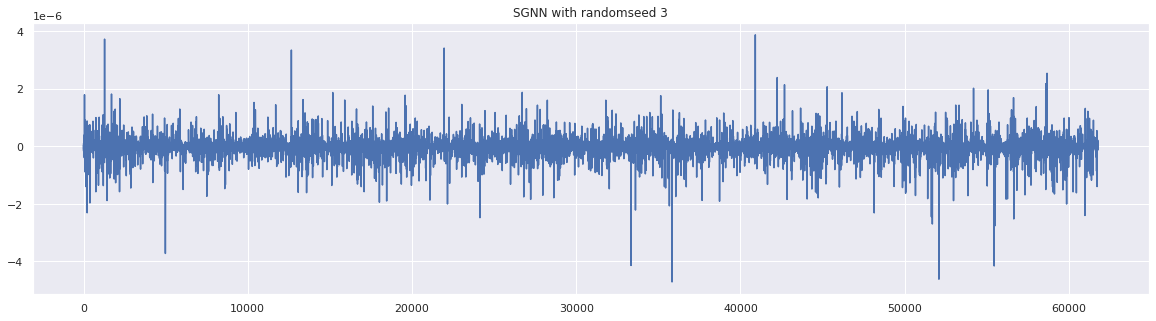

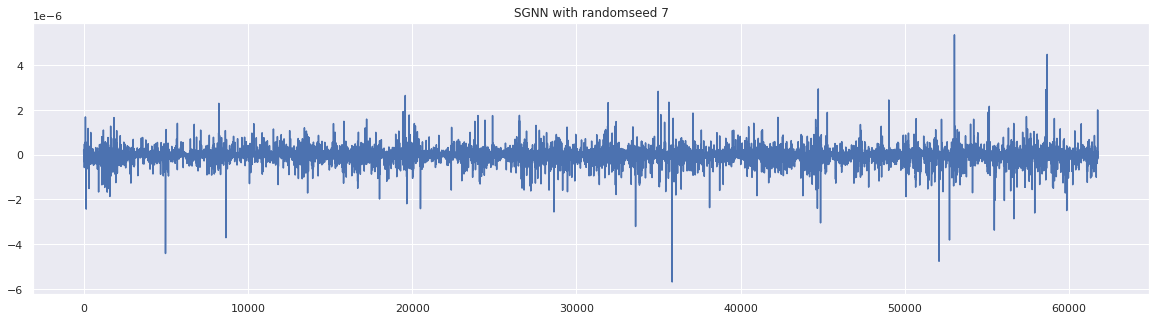

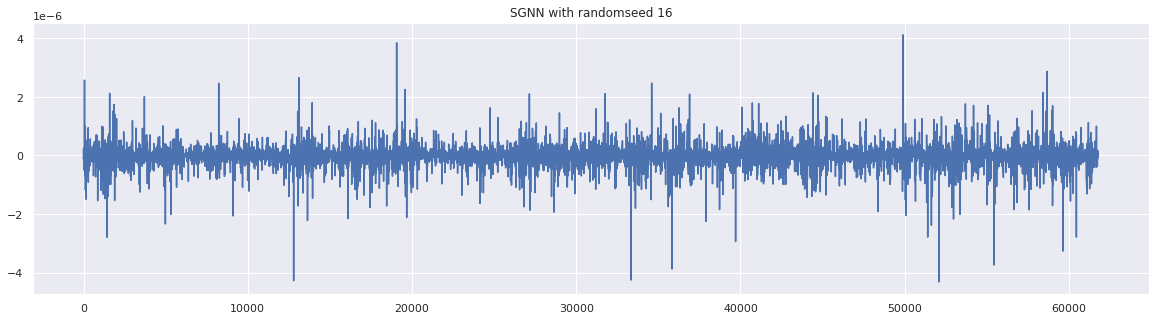

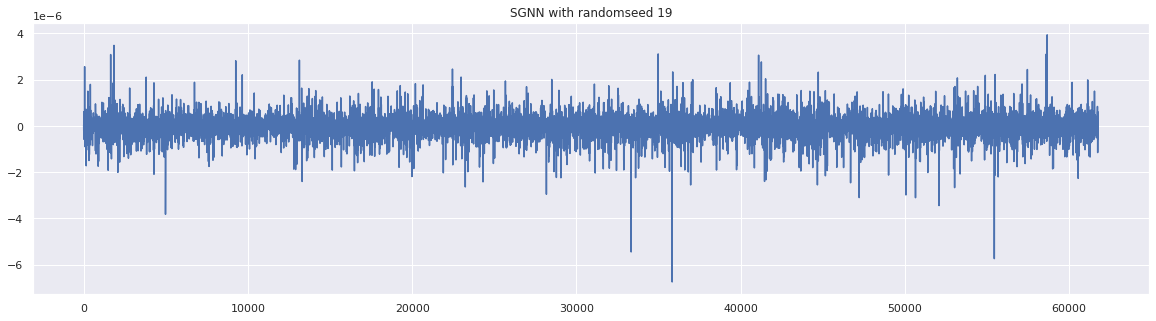

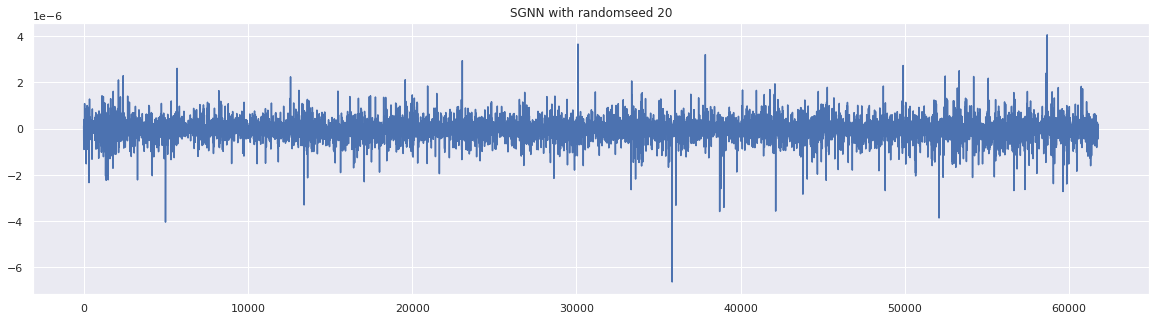

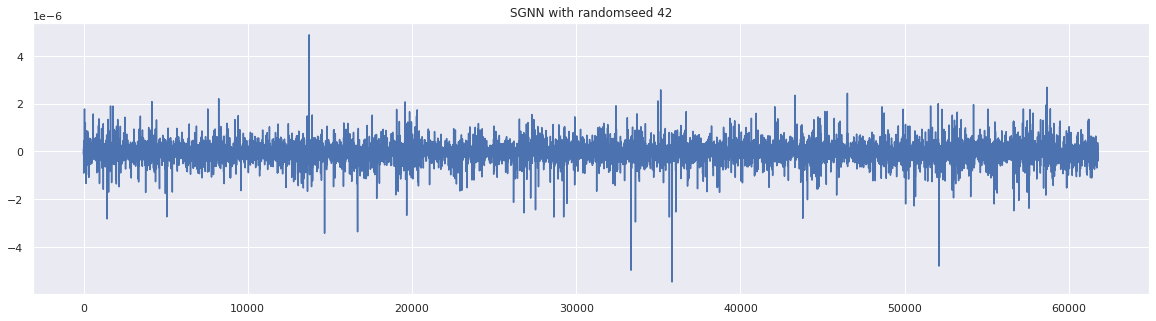

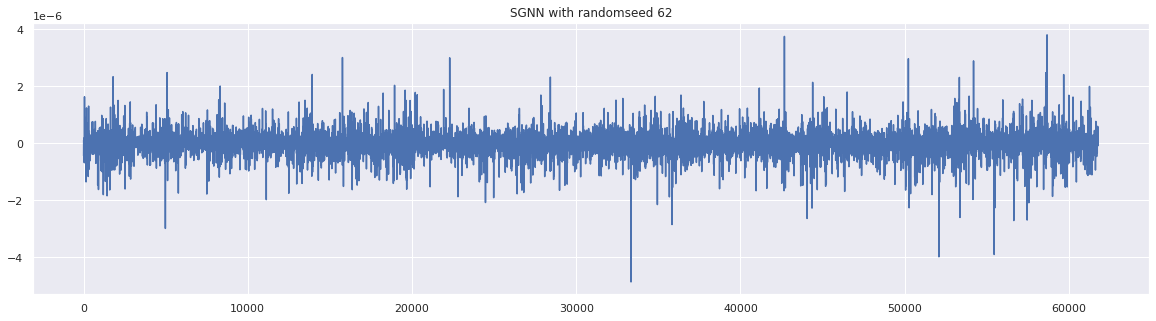

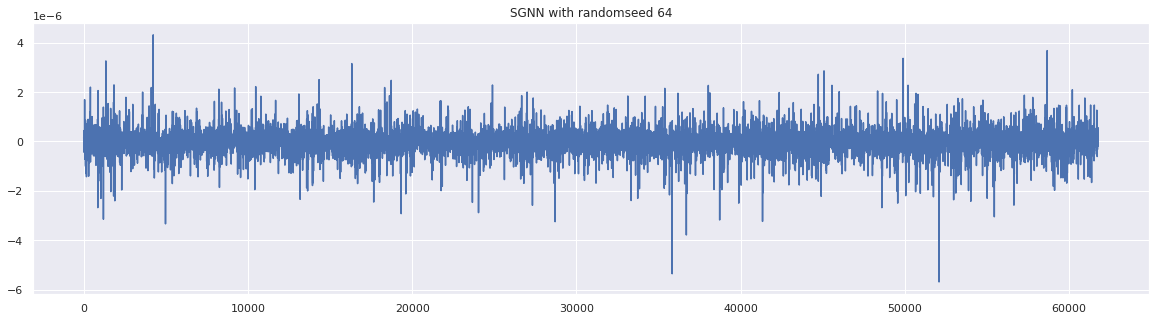

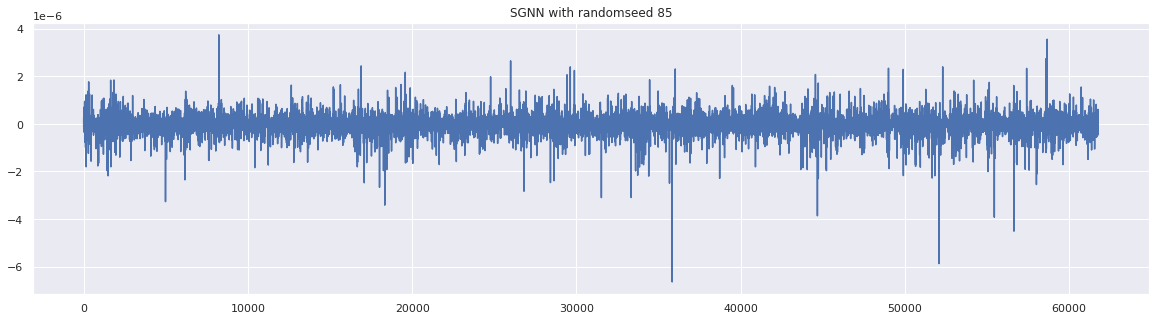

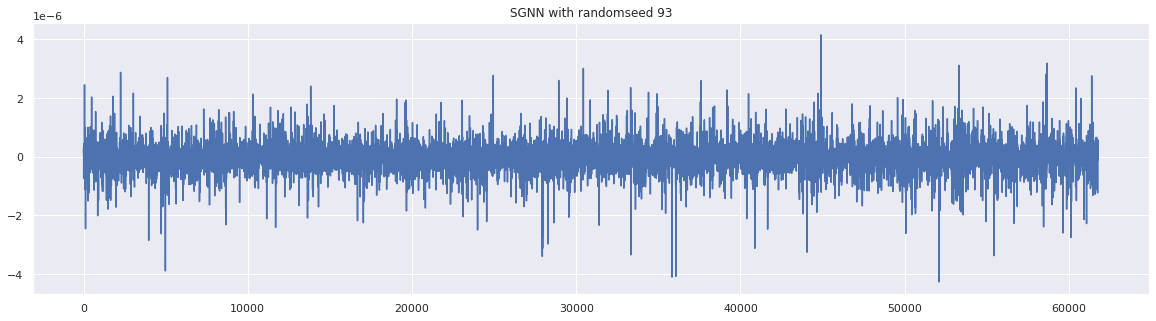

In [826]:
sns.set(font_scale=1)
for i in range(len(hsp_w.columns)):
    plt.figure(figsize=(20,5))
    plt.title(f"SGNN with randomseed {hsp_w.columns[i]}")
    plt.plot(hsp_w[hsp_w.columns[i]])
    plt.yscale("linear")
    plt.show()

In [827]:
top_dict

{'3': (array([   11,    19,    22, ..., 61712, 61714, 61719]),),
 '7': (array([   40,    42,    43, ..., 61665, 61706, 61740]),),
 '16': (array([   42,    50,    58, ..., 61665, 61674, 61729]),),
 '19': (array([    5,    15,    52, ..., 61743, 61754, 61772]),),
 '20': (array([    4,     5,    22, ..., 61706, 61729, 61745]),),
 '42': (array([   11,    13,    55, ..., 61706, 61749, 61757]),),
 '62': (array([    7,    12,    40, ..., 61689, 61692, 61757]),),
 '64': (array([   28,    58,    92, ..., 61702, 61712, 61760]),),
 '85': (array([    6,    18,    58, ..., 61759, 61769, 61770]),),
 '93': (array([    8,    32,    42, ..., 61731, 61745, 61763]),)}

In [828]:
top01 = [i for i in top_dict.values()]
total_top01 = []
for i in top01:
    for j in i[0]:
        total_top01.append(j)

In [829]:
top_roi,top_count = np.unique(total_top01,return_counts=True)

In [830]:
# sns.set(font_scale=1)
# plt.figure(figsize=(7,25))
# sns.barplot(y=top_roi[np.where(top_count>0)],x=top_count[np.where(top_count>0)],orient='h')

In [831]:
# Preparing draw feature map
parcels = pd.read_excel("/users/hjw/data/ABCD/Parcels/Parcels.xlsx", engine="openpyxl")
networks = list(parcels["Community"]) + 19 * ["Subcortex"]
networks_df = pd.DataFrame(networks, columns=["network"])
networks_df[networks_df["network"] == "Auditory"] = "AUD"
networks_df[networks_df["network"] == "Visual"] = "VIS"
networks_df[networks_df["network"] == "VentralAttn"] = "VAN"
networks_df[networks_df["network"] == "Subcortex"] = "SCN"
networks_df[networks_df["network"] == "Salience"] = "SAL"
networks_df[networks_df["network"] == "SMmouth"] = "SMM"
networks_df[networks_df["network"] == "SMhand"] = "SMH"
networks_df[networks_df["network"] == "RetrosplenialTemporal"] = "RSP"
networks_df[networks_df["network"] == "None"] = "NONE"
networks_df[networks_df["network"] == "FrontoParietal"] = "FPN"
networks_df[networks_df["network"] == "DorsalAttn"] = "DAN"
networks_df[networks_df["network"] == "Default"] = "DMN"
networks_df[networks_df["network"] == "CinguloParietal"] = "CPAR"
networks_df[networks_df["network"] == "CinguloOperc"] = "CON"
orig_networks = networks_df['network'].tolist()
networks_label = sorted(np.unique(networks_df['network'].values))
new_networks_label = networks_label.copy()
new_networks_label.remove("NONE")
new_networks_label.append("NONE")

new_orig_network_order = {
    key:value for (key, value) in 
    zip(new_networks_label, (np.arange(len(new_networks_label))))
}
sorted_networks = pd.DataFrame(index=orig_networks).sort_index(key=lambda x: x.map(new_orig_network_order), axis=0).index.tolist()
sorted_networks_df = pd.DataFrame(np.unique(sorted_networks, return_index=True)).T
sorted_networks_df.columns = ["networks", "n"]
sorted_networks_df = sorted_networks_df.sort_values(
    by="networks", key=lambda x: x.map(new_orig_network_order)
)

start_network_idx = np.array(sorted_networks_df.n)
next_network_idx = np.hstack((start_network_idx[1:], 352))

network_mid_idx = np.array((start_network_idx + next_network_idx) / 2, dtype=np.int)

/home/hjd/.local/lib/python3.6/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [832]:
def make_wfm(vec):
    wfm = np.zeros((tot_rois, tot_rois))
    iu_non_di_idx = np.mask_indices(tot_rois, np.triu, 1)
    wfm[iu_non_di_idx] = vec
    il_idx = np.tril_indices(tot_rois, -1)
    wfm[il_idx] = wfm.T[il_idx]
    wfm_df = pd.DataFrame(wfm, index=orig_networks, columns=orig_networks)
    wfm_df = wfm_df.sort_index(key=lambda x: x.map(new_orig_network_order), axis=0)
    wfm_df = wfm_df.sort_index(key=lambda x: x.map(new_orig_network_order), axis=1)
    
    return wfm_df

In [833]:
tot_rois=352

In [834]:
sample_mat = np.zeros(61776)
for i in range(1,11):
    sample_mat[top_roi[np.where(top_count==i)]] = i

np.unique(sample_mat,return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([43629, 13275,  2566,   728,   399,   256,   202,   174,   146,
          185,   216]))

In [835]:
wfm_top01 = make_wfm(sample_mat)

In [836]:
avg_w = make_wfm(stats.zscore(hsp_w.mean(1).values))

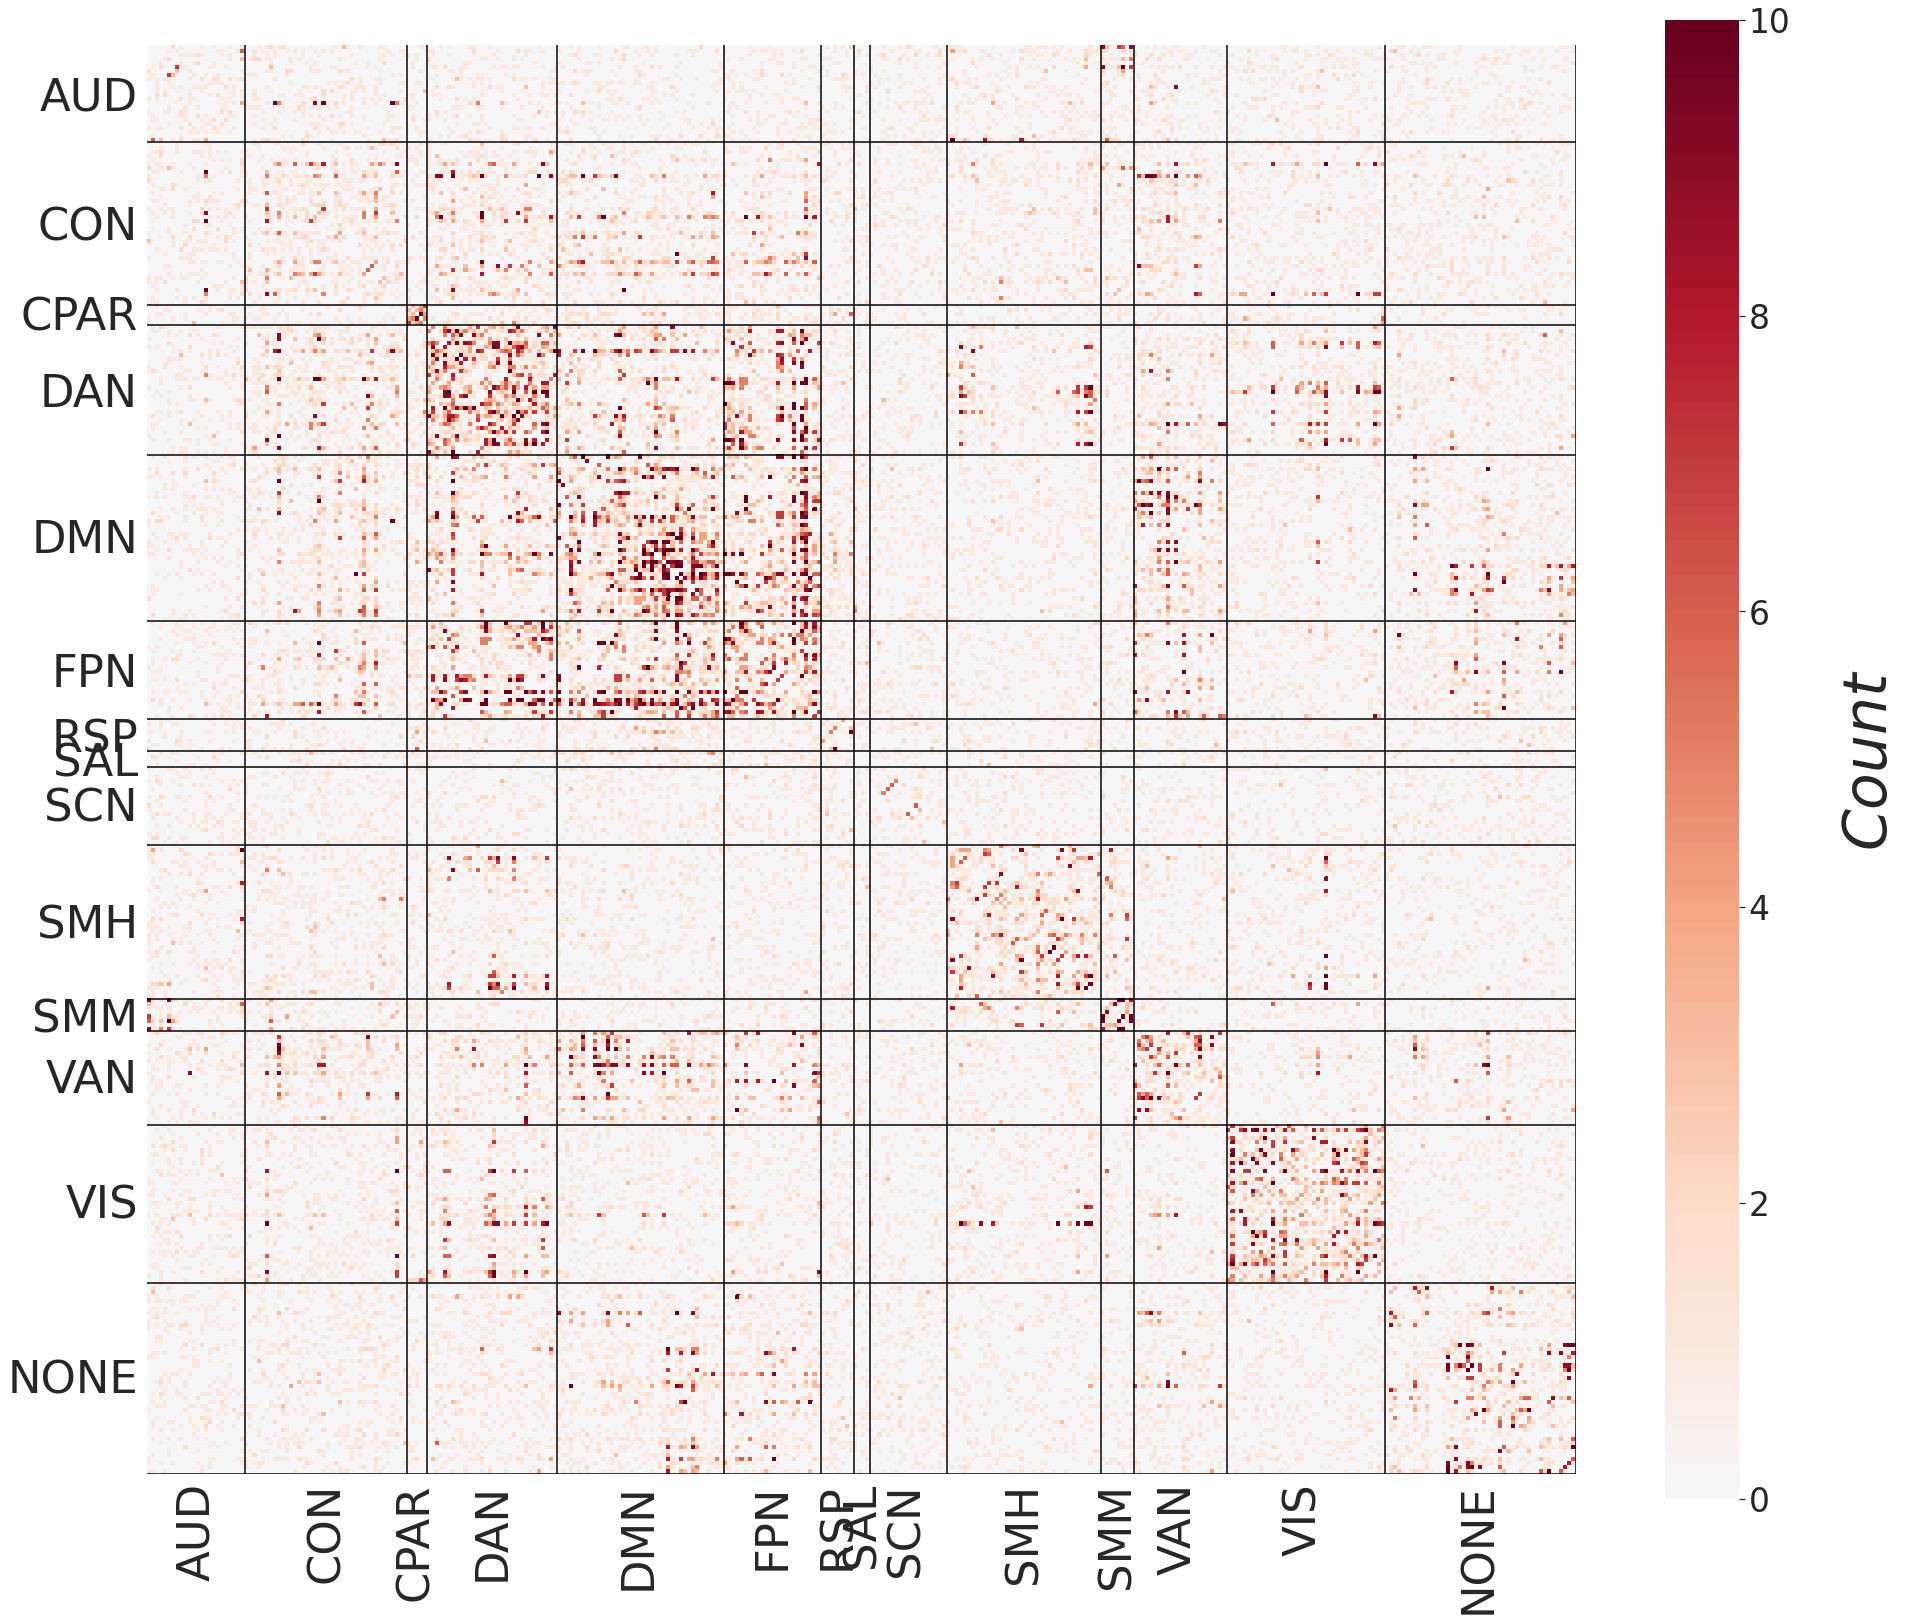

In [837]:
sns.set(style="white", font_scale=3)
fig, ax = plt.subplots(figsize=(32, 32))
cbar_kws = dict(use_gridspec=False, shrink=0.85, location="right")

sns.heatmap(
    wfm_top01, square=True, cmap="RdBu_r", center=0, 
    ax=ax, cbar_kws=cbar_kws
)

ax.set_xticks(network_mid_idx)
ax.set_yticks(network_mid_idx)

ax.set_xticklabels(new_networks_label, rotation=90, fontsize=45, ha="center")
ax.set_yticklabels(new_networks_label, rotation='horizontal', fontsize=45)

for network_pos in next_network_idx:
    plt.axvline(network_pos, linewidth=1.5, color="black", ymin=0, ymax=network_pos)
    plt.axhline(network_pos, linewidth=1.5, color="black", xmin=0, xmax=network_pos)

cbar = ax.collections[0].colorbar
cbar.set_label("$Count$", fontsize=60, labelpad=50)